In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report#评估指标
from sklearn import preprocessing #数据预处理标准化等

scale = True

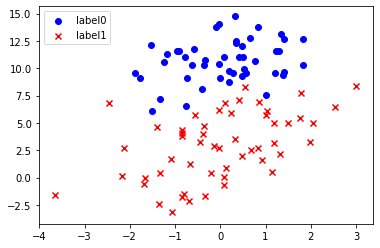

In [22]:
#载入数据

data = np.genfromtxt('LR-testSet.csv', delimiter = ',')

x_data = data[:,:-1]
y_data = data[:,-1]

def plot():
    x0 = []
    x1 = []
    y0 = []
    y1 = []
    for i in range(len(x_data)):
        if y_data[i] == 0:
            x0.append(x_data[i,0])
            y0.append(x_data[i,1])
        else:
            x1.append(x_data[i,0])
            y1.append(x_data[i,1])
    scatter0 = plt.scatter(x0,y0,c= 'b', marker='o')
    scattter1 = plt.scatter(x1, y1, c = 'r', marker = 'x')
    plt.legend(handles = [scatter0, scattter1], labels = ['label0', 'label1'], loc= 'best')
plot()
plt.show()

In [23]:
y_data = data[:,-1,np.newaxis]
print(x_data.shape)
print(y_data.shape)
X_data = np.concatenate((np.ones((x_data.shape[0],1)),x_data),axis =1)
print(X_data.shape)

(100, 2)
(100, 1)
(100, 3)


In [24]:
#定义sigmod函数
#对位相乘  注意这里的含义，因为是两个数相乘累加
def sigmoid(x):
    return 1/(1 + np.exp(-x))
a = sigmoid(X_data)
print(a.shape)

def cost(xMat, yMat, ws):
    left = np.multiply(yMat, np.log(sigmoid(xMat * ws))) 
    right = np.multiply(1-yMat, np.log(1-sigmoid(xMat *ws)))
    return np.sum(left + right)/ -(len(xMat))
                      
def gradAscent(xArr, yArr):
    if scale == True:
        xArr = preprocessing.scale(xArr)
                      
    xMat = np.mat(xArr)
    yMat = np.mat(yArr)
        
    Ir = 0.001
    epochs = 10000
    costList = []#保存cost的值
                      
    m,n = np.shape(xMat)
        #初始化权值
    ws = np.mat(np.ones((n,1)))
                      
    for i in range(epochs + 1):
        h = sigmoid(xMat*ws)
                      
        ws_grad = xMat.T * (h - yMat)/m #两个矩阵相乘累加
        ws = ws - Ir * ws_grad

        if i % 50 == 0:
            costList.append(cost(xMat, yMat, ws))
    return ws,costList
#     else:
#         return ('scale is false')
            
            
        
    

(100, 3)


In [25]:
#训练模型

ws, costList = gradAscent(X_data, y_data)
print(ws)

[[ 1.        ]
 [ 0.30816757]
 [-1.76171512]]


In [26]:
if scale == False:
#画图决策边界

    plot()
    x_test = [[-4],[3]]
    y_test = -(ws[0] +x_test * ws[1])/ws[2]
    
    plt.plot(x_test,y_test,'k')
    plt.show()
    

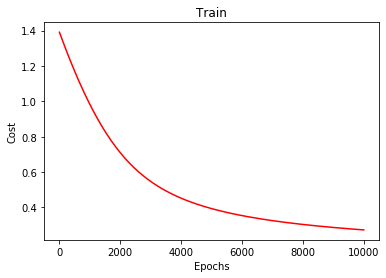

In [27]:
#画loss值的变化

x = np.linspace(0,10000,201)
plt.plot(x,costList,c = 'r')
plt.title('Train')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.show()

In [28]:
#预测
def predict(x_data, ws):
    if scale == True:
        x_data = preprocessing.scale(x_data)
    xMat = np.mat(x_data)
    ws = np.mat(ws)
    return [1 if x >=0.5 else 0 for x in sigmoid(xMat*ws)]

predictions = predict(X_data, ws)
print(classification_report(y_data,predictions))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        47
         1.0       1.00      0.92      0.96        53

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



In [10]:
#数据标准化改变数据结构，同样的迭代次数提高了准确率，召回率，利于梯度下降法

In [22]:
A_test = np.arange(1,13,2).reshape(2,3)
print(A_test)
print(np.sum(A_test, axis =1) )#行求值
print(np.max(A_test,axis =1)) #行最大值
print(np.average(A_test, axis =1))#行平均值
print(np.delete(A_test, [i for i in range(1)],axis =1))#删掉一列
print(A_test[0][2])

[[ 1  3  5]
 [ 7  9 11]]
[ 9 27]
[ 5 11]
[3. 9.]
[[ 3  5]
 [ 9 11]]
5
